# Kaggle Competition: Facial Expression Recognition

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

## Data Exploration

### Overview of Dataset

In [1]:
import cv2
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import display
from sklearn.model_selection import train_test_split
from pathlib import Path

def load_raw_data():
    
    data = pd.read_csv("fer2013.csv")

    usage_ix = data.drop_duplicates('Usage')['Usage']
    usage_ix = usage_ix.index
    n_classes = len(data.drop_duplicates('emotion')['emotion'].values)
    return data, usage_ix, n_classes

#::::::::TEST:::::::#
data, usage_ix, n_classes = load_raw_data()
display(data.head(n=10))
print ("\033[1mThe total number of rows in dataset\033[0m\n")
print (data.count())
print ("\n\033[1mAll the keywords with their starting index in 'Usage' column\n\033[0m")
print (data.drop_duplicates('Usage')['Usage'])

print ("\nThere are", n_classes,"Labels in total for each emotion")
print (data.drop_duplicates('emotion')['emotion'].values)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


The total number of rows in dataset

emotion    35887
pixels     35887
Usage      35887
dtype: int64

All the keywords with their starting index in 'Usage' column

0           Training
28709     PublicTest
32298    PrivateTest
Name: Usage, dtype: object

There are 7 Labels in total for each emotion
[0 2 4 6 3 5 1]


### Dataset Classification

In [4]:
def dataset_clf(data, usage_ix):
    """Classify the dataset based on the keyword in 'Usage' column, and divide training data into batches.
       Finally, save all sub-dataset into csv file.
    
    Args:
       data: DataFrame of raw dataset
       usage_ix: A list of index of unique keywords in 'Usage' column
    """
    ix = 0
    n_batches = 6    # tunable
    batch_size = 5000    # tunable
    
    # check or save training batches
    for batch_i in range(1,n_batches+1):
        
        batch_file = Path("C:/Users/xiaow/Desktop/fer2013/training_batch_"+str(batch_i)+".csv")
        if batch_file.is_file():
            print("File 'training_batch_"+str(batch_i)+".csv' is found")
            ix += batch_size
            
        else:
    
            if (usage_ix[1]-1)-ix < batch_size:
                data.loc[ix : usage_ix[1]-1].to_csv("training_batch_"+str(batch_i)+".csv")
                print ("File 'training_batch_"+str(batch_i)+".csv' saved successfully")
 
            else:
                data.loc[usage_ix[0] + ix : ix + (batch_size-1)].to_csv("training_batch_"+str(batch_i)+".csv")
                print ("File 'training_batch_"+str(batch_i)+".csv' saved successfully")
            
            ix += batch_size
    
    # check or save public test
    batch_file = Path("C:/Users/xiaow/Desktop/fer2013/public_test.csv")
    if batch_file.is_file():
        print("File 'public_test.csv' is found")
    else:
        data.loc[usage_ix[1]:usage_ix[2]-1].to_csv("public_test.csv")    # save public testing data
        print ("File 'public_test.csv' saved successfully")

    # check or save private test
    batch_file = Path("C:/Users/xiaow/Desktop/fer2013/private_test.csv")
    if batch_file.is_file():
        print("File 'private_test.csv' is found")
    else:
        data.loc[usage_ix[2]:].to_csv("private_test.csv")    # save private testing data
        print ("File 'private_test.csv' saved successfully")

    return n_batches, batch_size

#::::::::TEST:::::::#
n_batches, batch_size = dataset_clf(data, usage_ix)

File 'training_batch_1.csv' is found
File 'training_batch_2.csv' is found
File 'training_batch_3.csv' is found
File 'training_batch_4.csv' is found
File 'training_batch_5.csv' is found
File 'training_batch_6.csv' is found
File 'public_test.csv' is found
File 'private_test.csv' is found


In [5]:
def load_batches(batch_num):
    
    data = pd.read_csv("training_batch_"+str(batch_num)+".csv")
            
    return data
        
#::::::::TEST:::::::#
batch_num = 1    # tunable
batch_data = load_batches(batch_num)
print("The overview of loaded batch:")
batch_data.count()

The overview of loaded batch:


Unnamed: 0    5000
emotion       5000
pixels        5000
Usage         5000
dtype: int64

### Image_array visualization

In [6]:
def training_image_visual(n_batches, batch_size):
    
    print("Checking if all training images exist...")
    for batch_i in range(1,n_batches+1):
        
        dir_path = "./Images/Batch"+str(batch_i)   # check if the directory exists
        if os.path.isdir(dir_path):
            pass
        else:
            os.mkdir(dir_path)
        
        num_files = len(os.listdir(dir_path))    # check if all images exist
        if num_files == batch_size:
            pass
        else:
            batch_pixel = load_batches(batch_i)["pixels"]
            last_index = batch_pixel.tail(1).index.values[0]
            image_path = './Images/Batch'+str(batch_i)+"/"

            for row_ix in range(last_index+1):
                image = batch_pixel.loc[row_ix].split()
                image = list(map(int, image))
                image = np.array(image).reshape((48,48))
                cv2.imwrite(image_path+"batch_"+str(batch_i)+"_"+str(row_ix)+".png", image)

    print("Checking finished! All images are now available in the path ./Images/")

#::::::::TEST:::::::#
training_image_visual(n_batches, batch_size)

Checking if all training images exist...
Checking finished! All images are now available in the path ./Images/


### Sample Image

[Image Info]

Batch: 1 
Example of image 1212 with shape of: (48, 48)
Label (Emotion): 3

[Pixel Info]

First 18 pixels: [155, 153, 154, 153, 154, 154, 154, 154, 153, 153, 154, 154, 154, 161, 115, 66, 64, 67] 
Max value of pixels: 235 
MIn value of pixels: 0
Type of each pixel: uint8


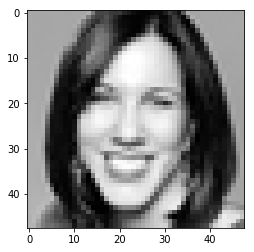

(48, 48)
[[155 153 154 ..., 153 153 155]
 [154 153 153 ..., 154 155 155]
 [154 153 153 ..., 154 155 155]
 ..., 
 [163 169 166 ..., 208 208 183]
 [164 170 150 ..., 209 152 111]
 [165 164 142 ..., 133  92 101]]
Picture saved?
 True


In [7]:
batch_num = 1     # the batch number (tunable)
eximg_ix = 1212    # the index of sample image to be displayed (tunable), max # 5000

tmp_data = pd.read_csv("training_batch_"+str(batch_num)+".csv")
image = tmp_data.loc[eximg_ix]['pixels'].split()
img = list(map(int, image))
image = np.array(img).astype(np.uint8).reshape((48,48))


print ("[Image Info]\n")
print ("Batch:", batch_num, "\nExample of image", eximg_ix, "with shape of:", image.shape)
sample_emotion = tmp_data.loc[eximg_ix]['emotion']
print ("Label (Emotion):", sample_emotion)
print ("\n[Pixel Info]\n")
print ("First 18 pixels:", img[:18], "\nMax value of pixels:", max(img), "\nMIn value of pixels:", min(img))
print ("Type of each pixel:", image.dtype)
plt.imshow(image, cmap='gray')
plt.show()
print(image.shape)
print(image)
print("Picture saved?\n",cv2.imwrite("sample.png", image))

## Image Preprocessing

### Head Detection

In [8]:
def biggest_obj(object):

        if object is tuple():
            return None, None, None, None

        biggest_obj = [0]*5    # biggest_obj = [area, x, y, w, h]

        for (x, y, w, h) in object:
            biggest_obj.append(w*h)
            if w*h > biggest_obj[0]:
                biggest_obj[0] = w*h
                biggest_obj[1:5] = x, y, w, h

        return biggest_obj[1:5]

Head was successfully detected!


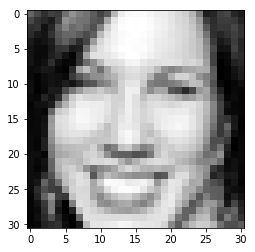

In [9]:
def detect_head(image):
    
    init_height, init_width = image.shape[:2]
    
    face_casc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_casc.detectMultiScale(image, scaleFactor=1.1, minNeighbors=3)
  
    x, y, w, h = biggest_obj(faces)
    if x is None:
        return False, "Head was not detected.", image, init_height, init_width
    
    image = image[y:y+h,x:x+w]
    
    return True, "Head was successfully detected!", image, init_height, init_width

#::::::::TEST:::::::#
head_bool, comments, image_arr, init_height, init_width = detect_head(image)
print(comments)
plt.imshow(image_arr, cmap='gray')
plt.show()

In [22]:
def expand_image(image, init_height, init_width):
    
    height, width = image.shape[:2]

    # expand in "width" direction
    append_width = np.zeros( (height, (init_width - width)//2), dtype=np.int8 )
    image = np.append(append_width, image, axis=1)
    image = np.append(image, append_width, axis=1)

    if image.shape[0]%2 != 0:
        image = np.append(image, np.zeros((height,1), dtype=np.int8), axis=1)

    # expand in "height direction
    append_height = np.zeros( ((init_height - height)//2, init_width), dtype=np.int8 )
    image = np.append(append_height, image, axis=0)
    image = np.append(image, append_height, axis=0)

    if image.shape[0]%2 != 0:
        image = np.append(image, np.zeros((1,init_width), dtype=np.int8), axis=0)
        
    return image

The shape of normalized image: (48, 48)


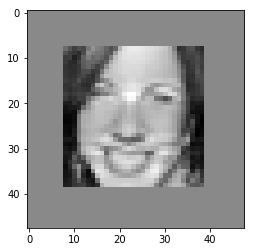

In [23]:
def norm_image(image, head_bool, init_height, init_width):
    
    image = ( image - image.mean() )*(100/255)
    image = ( image - image.mean(axis=1).reshape(-1,1) )/ image.std(axis=1).reshape(-1,1)
    
    if head_bool is True:
        image = expand_image(image, init_height, init_width)
        return image
        
    return image

#::::::::TEST:::::::#
normed_image = norm_image(image_arr, head_bool, init_height, init_width)
print("The shape of normalized image:",normed_image.shape)
plt.imshow(normed_image, cmap='gray')
plt.show()

### One Hot Encoding

In [24]:
def one_hot_encode(data):
    
    
    all_labels = data["emotion"].values.ravel()
    num_labels = all_labels.shape[0]
    
    n_classes = len(data.drop_duplicates('emotion')['emotion'].values)
    
    index_offset = np.arange(num_labels) * n_classes
    labels_one_hot = np.zeros((num_labels, n_classes), dtype=np.int8)
    labels_one_hot.flat[index_offset + all_labels] = 1
    np.array(labels_one_hot).astype(np.uint8)

    return labels_one_hot

#::::::::TEST:::::::#
tmp_data = load_batches(1)
labels_one_hot = one_hot_encode(tmp_data)
print(labels_one_hot)
print(type(labels_one_hot), labels_one_hot.dtype)
print("The shape of labels_one_hot:", labels_one_hot.shape)

[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]]
<class 'numpy.ndarray'> int8
The shape of labels_one_hot: (5000, 7)


### Pixel Preprocessing

In [25]:
def pixels_preprocess(data):

    last_index = data.tail(1).index.values[0]
    for row_ix in range(last_index+1):
            
        each_image = data.loc[row_ix]['pixels'].split()
        each_image = np.array(each_image).astype(np.uint8).reshape((48,48))
        
        # head detection and image normalization
        head_bool, comments, image_arr, init_height, init_width = detect_head(each_image)
        normed_image = norm_image(image_arr, head_bool, init_height, init_width)
        normed_image = normed_image.reshape((1,-1))
        
        if row_ix == 0:
            preprocessed_pixel = normed_image

        else:
            preprocessed_pixel = np.append(preprocessed_pixel, normed_image, axis=0)
        
    return preprocessed_pixel.reshape((-1, 48, 48, 1))

#::::::::TEST:::::::#
tmp_data = load_batches(1)
preprocessed_pixel = pixels_preprocess(tmp_data)
print("pixels preprocess was successful with the shape of", preprocessed_pixel.shape)

c:\users\xiaow\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


pixels preprocess was successful with the shape of (5000, 48, 48, 1)


### Dataset Split

In [26]:
def train_valid_split(data):
    
    images = pixels_preprocess(data)
    labels = one_hot_encode(data)

    train_image, valid_image, train_label, valid_label = train_test_split(images, labels,
                                                                          stratify=labels, 
                                                                          test_size=0.1, 
                                                                          random_state = 42)

    return train_image, valid_image, train_label, valid_label

#::::::::TEST:::::::#
batch_data = load_batches(1)
train_image, valid_image, train_label, valid_label = train_valid_split(batch_data)

print("The shape of training images:", train_image.shape)
print("The shape of validation images:", valid_image.shape)
print("The shape of training labels:", train_label.shape)
print("The shape of validation labels:", valid_label.shape)

c:\users\xiaow\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


The shape of training images: (4500, 48, 48, 1)
The shape of validation images: (500, 48, 48, 1)
The shape of training labels: (4500, 7)
The shape of validation labels: (500, 7)


### Check Point

In [30]:
def train_valid_data_save(n_batches):
    
    for batch_i in range(1,n_batches+1):
        
        batch_split_file = Path("C:/Users/xiaow/Desktop/fer2013/batch_"+str(batch_i)+"_split.p")
        if batch_split_file.is_file():
            print("File 'batch_"+str(batch_i)+"_split.p' is found")
            
        else:
               
            batch_data = load_batches(batch_i)
            train_image_i, valid_image_i, train_label_i, valid_label_i = train_valid_split(batch_data)
            pickle.dump((train_image_i, train_label_i), open("batch_"+str(batch_i)+"_training_data.p", 'wb'))
            
        if batch_i == 1:
            valid_image, valid_label = valid_image_i, valid_label_i

        else:
            valid_image = np.append(valid_image, valid_image_i, axis=0)
            valid_label = np.append(valid_label, valid_label_i, axis=0)
        
    pickle.dump((valid_image, valid_label), open("validation_data.p", 'wb'))
    print("File 'validation_data.p' was saved successfully")
        
    return None

#::::::::TEST::::::#
n_batches = 6
train_valid_data_save(n_batches)

c:\users\xiaow\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


File 'validation_data.p' was saved successfully


In [45]:
valid_images, valid_labels = pickle.load(open("validation_data.p", mode='rb'))

## CNN Model

### Input Layer

In [46]:
def nn_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    
    image_shape = list(image_shape)
    return tf.placeholder(tf.float32, shape=[None, image_shape[0], image_shape[1], image_shape[2]], name="x")

def nn_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """

    return tf.placeholder(tf.float32, shape=[None, n_classes], name="y")

def nn_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    
    return tf.placeholder(tf.float32, shape=None, name="keep_prob")

### Convolution Layer

In [47]:
def conv2d(x_tensor, conv_num_outputs, conv_ksize, conv_strides, padding):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param padding: padding method ('VALID' or 'SAME')
    : return: A tensor that represents convolution and max pooling of x_tensor
    """

    batch_size, image_height, image_width, channels = x_tensor.get_shape().as_list()
                     
    conv_layer = tf.nn.conv2d(x_tensor,
                              filter=tf.Variable(tf.truncated_normal(list(conv_ksize)+[channels, conv_num_outputs])),
                              strides=[1]+list(conv_strides)+[1],
                              padding=padding
                              )

    conv_layer = tf.nn.bias_add(value=conv_layer,
                                bias=tf.Variable(tf.zeros(conv_num_outputs))
                                )
    
    conv_layer = tf.nn.relu(conv_layer)
   
    return conv_layer

### Maxpooling Layer

In [48]:
def max_pool(x_tensor, pool_ksize, pool_strides, padding):

    maxpool_layer = tf.nn.max_pool(x_tensor,
                                   ksize=[1]+list(pool_ksize)+[1],
                                   strides=[1]+list(pool_strides)+[1],
                                   padding=padding
                                   )
    
    return maxpool_layer

### Flatten Layer

In [49]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    batch_size, image_height, image_width, channels = x_tensor.get_shape().as_list()
    flatten_layer = tf.reshape(x_tensor,
                               shape=[-1, image_height*image_width*channels]
                               )
    
    return flatten_layer

### Fully-connected Layer

In [50]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """

    batch_size, other = x_tensor.get_shape().as_list()

    weight = tf.Variable( tf.truncated_normal(shape = [other, num_outputs]) )
    
    bias = tf.Variable(tf.zeros(num_outputs))

    full_layer = tf.add(tf.matmul(x_tensor, weight), bias)
    full_layer = tf.nn.relu(full_layer)
    
    return full_layer

### Output Layer

In [51]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    batch_size, other = x_tensor.get_shape().as_list()

    weight = tf.Variable( tf.truncated_normal(shape = [other, num_outputs]) )
    
    bias = tf.Variable(tf.zeros(num_outputs))
       
    output_layer = tf.add(tf.matmul(x_tensor, weight), bias)
    
    return output_layer

### CNN Architecture

In [52]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_nn = conv2d(x, conv_num_outputs=96, conv_ksize=(5,5), conv_strides=(2,2), padding='SAME')
    
    conv_nn = max_pool(conv_nn, pool_ksize=(3,3), pool_strides=(2,2), padding='SAME')
       
    conv_nn = conv2d(conv_nn, conv_num_outputs=128, conv_ksize=(3,3), conv_strides=(2,2), padding='SAME')
    
    conv_nn = max_pool(conv_nn, pool_ksize=(3,3), pool_strides=(2,2), padding='SAME')
    
    conv_nn = tf.nn.dropout(conv_nn, keep_prob)
    
    conv_nn = conv2d(conv_nn, conv_num_outputs=256, conv_ksize=(3,3), conv_strides=(2,2), padding='SAME')

    conv_nn = max_pool(conv_nn, pool_ksize=(3,3), pool_strides=(2,2), padding='SAME')                         
  
    conv_nn = flatten(conv_nn)
    
    conv_nn = fully_conn(conv_nn, num_outputs = 2000)

    conv_nn = fully_conn(conv_nn, num_outputs = 2000)
    
    conv_nn = output(conv_nn, num_outputs = 7)
    
    return conv_nn

In [53]:
import problem_unittests as tests

In [71]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = nn_image_input((48,48,1))
y = nn_label_input(7)
keep_prob = nn_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
print(cost)
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Tensor("Mean:0", shape=(), dtype=float32)


## Train the CNN Model

### Single Optimization

In [68]:
def train_neural_network(session, optimizer, keep_probability, train_images, train_labels):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : train_images: Batch of Numpy image data
    : train_labels: Batch of Numpy label data
    """

    session.run(optimizer, feed_dict={x:train_images, y:train_labels, keep_prob:keep_probability})

    return None

### Show Stats

In [69]:
def print_stats(session, train_images, train_labels, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : train_images: Batch of Numpy image data
    : train_labels: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """

    loss = session.run(cost, feed_dict={x:train_images, y:train_labels, keep_prob:1.0})
    print(cost,"cost")
    valid_accuracy = sess.run(accuracy, feed_dict={
                x: valid_images,
                y: valid_labels,
                keep_prob: 1.0})
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_accuracy))
    
    return None

### Train on a single batch

In [70]:
print('Checking the Training on a Single Batch...')

batch_i = 1
batch_step = 128
epochs = 60
keep_probability = 0.8



with tf.Session() as sess:
    
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    count = 0
    train_images, train_labels = pickle.load(open("batch_"+str(batch_i)+"_training_data.p", mode='rb'))
    
    for epoch in range(epochs):

        for step in range(len(train_images)//batch_step + 1):
            train_neural_network(sess, optimizer, keep_probability, 
                                 train_images[count:count+batch_step], train_labels[count:count+batch_step])
            if count+batch_step > len(train_images):
                count += len(train_images)-count
            else:
                count += batch_step

        print('Epoch {:>2}, Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, train_images, train_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, Batch 1:  Tensor("Mean:0", shape=(), dtype=float32) cost
Loss:        nan Validation Accuracy: 0.136886
Epoch  2, Batch 1:  Tensor("Mean:0", shape=(), dtype=float32) cost
Loss:        nan Validation Accuracy: 0.136886
Epoch  3, Batch 1:  

KeyboardInterrupt: 